**Desenvolver um modelo de aprendizado de máquina supervisionado capaz de prever se um funcionário deixará a empresa.**


**Análise de Previsão de Rotatividade de Funcionários**

**Introdução**
Hoje, vamos discutir como um modelo de aprendizado de máquina pode ajudar a prever se um funcionário deixará a empresa. Usamos dados de vários atributos dos funcionários para criar um modelo que nos ajude a identificar possíveis saídas.

In [ ]:
import pandas as pd
rh = pd.read_csv('/content/rh_data.csv')
rh.info()
rh

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      4410 non-null   int64  
 1   Attrition                4410 non-null   object 
 2   BusinessTravel           4410 non-null   object 
 3   Department               4410 non-null   object 
 4   DistanceFromHome         4410 non-null   int64  
 5   Education                4410 non-null   int64  
 6   EducationField           4410 non-null   object 
 7   EmployeeCount            4410 non-null   int64  
 8   EmployeeID               4410 non-null   int64  
 9   Gender                   4410 non-null   object 
 10  JobLevel                 4410 non-null   int64  
 11  JobRole                  4410 non-null   object 
 12  MaritalStatus            4410 non-null   object 
 13  MonthlyIncome            4410 non-null   int64  
 14  NumCompaniesWorked      

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,1.0,Y,11,8,0,1.0,6,1,0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,0.0,Y,23,8,1,6.0,3,5,1,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,1.0,Y,15,8,3,5.0,2,5,0,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,...,3.0,Y,11,8,3,13.0,5,8,7,5
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,...,4.0,Y,12,8,2,9.0,2,6,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,42,No,Travel_Rarely,Research & Development,5,4,Medical,1,4406,Female,...,3.0,Y,17,8,1,10.0,5,3,0,2
4406,29,No,Travel_Rarely,Research & Development,2,4,Medical,1,4407,Male,...,2.0,Y,15,8,0,10.0,2,3,0,2
4407,25,No,Travel_Rarely,Research & Development,25,2,Life Sciences,1,4408,Male,...,0.0,Y,20,8,0,5.0,4,4,1,2
4408,42,No,Travel_Rarely,Sales,18,2,Medical,1,4409,Male,...,0.0,Y,14,8,1,10.0,2,9,7,8


In [ ]:
# Verificar quais colunas têm valores duplicados
duplicate_columns = {}
for col in rh.columns:
    duplicated = rh.duplicated(subset=[col])
    num_duplicates = duplicated.sum()
    if num_duplicates > 0:
        duplicate_columns[col] = num_duplicates

print("Colunas com valores duplicados e seus respectivos números de duplicatas:")
for col, num_duplicates in duplicate_columns.items():
    print(f"{col}: {num_duplicates}")

rh.duplicated().sum()

Colunas com valores duplicados e seus respectivos números de duplicatas:
Age: 4367
Attrition: 4408
BusinessTravel: 4407
Department: 4407
DistanceFromHome: 4381
Education: 4405
EducationField: 4404
EmployeeCount: 4409
Gender: 4408
JobLevel: 4405
JobRole: 4401
MaritalStatus: 4407
MonthlyIncome: 3061
NumCompaniesWorked: 4399
Over18: 4409
PercentSalaryHike: 4395
StandardHours: 4409
StockOptionLevel: 4406
TotalWorkingYears: 4369
TrainingTimesLastYear: 4403
YearsAtCompany: 4373
YearsSinceLastPromotion: 4394
YearsWithCurrManager: 4392


0

In [ ]:
# Verificar a variação nas colunas
print(rh['StandardHours'].unique())
print(rh['EmployeeCount'].unique())
print(rh['Over18'].unique())
print(rh['BusinessTravel'].unique())
print(rh['Department'].unique())
print(rh['EducationField'].unique())
print(rh['Gender'].unique())
print(rh['JobRole'].unique())
print(rh['MaritalStatus'].unique())
print(rh['Attrition'].unique())

# Verificar estatísticas descritivas
print('Verificar estatísticas descritivas: ')
print(rh.describe())

[8]
[1]
['Y']
['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
['Sales' 'Research & Development' 'Human Resources']
['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
['Female' 'Male']
['Healthcare Representative' 'Research Scientist' 'Sales Executive'
 'Human Resources' 'Research Director' 'Laboratory Technician'
 'Manufacturing Director' 'Sales Representative' 'Manager']
['Married' 'Single' 'Divorced']
['No' 'Yes']
Verificar estatísticas descritivas: 
               Age  DistanceFromHome    Education  EmployeeCount   EmployeeID  \
count  4410.000000       4410.000000  4410.000000         4410.0  4410.000000   
mean     36.923810          9.192517     2.912925            1.0  2205.500000   
std       9.133301          8.105026     1.023933            0.0  1273.201673   
min      18.000000          1.000000     1.000000            1.0     1.000000   
25%      30.000000          2.000000     2.000000            1.0  1103.250000   
50%      36.000000 

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Remover variáveis fora do escopo
rh = rh.drop(['Over18', 'EmployeeCount'], axis=1)

# Codificação da variável Attrition
le = LabelEncoder()
rh['Attrition'] = le.fit_transform(rh['Attrition'])

# Codificação das variáveis categóricas em dummies
categorical_cols = ['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus']
rh = pd.get_dummies(rh, columns=categorical_cols, drop_first=False)

# Lidar com valores ausentes
rh.fillna(rh.median(), inplace=True)

# Verificar a informação do dataframe preparado
rh.info()
#print(rh.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 42 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age                                4410 non-null   int64  
 1   Attrition                          4410 non-null   int64  
 2   DistanceFromHome                   4410 non-null   int64  
 3   Education                          4410 non-null   int64  
 4   EmployeeID                         4410 non-null   int64  
 5   JobLevel                           4410 non-null   int64  
 6   MonthlyIncome                      4410 non-null   int64  
 7   NumCompaniesWorked                 4410 non-null   float64
 8   PercentSalaryHike                  4410 non-null   int64  
 9   StandardHours                      4410 non-null   int64  
 10  StockOptionLevel                   4410 non-null   int64  
 11  TotalWorkingYears                  4410 non-null   float

In [ ]:
import numpy as np
import plotly.express as px
import plotly.graph_objects as go

# Lidar com valores ausentes
#rh.fillna(rh.median(), inplace=True)

fig = px.histogram(rh, x='Attrition', title='Distribuição de Funcionários que Saíram e que Ficaram')
fig.show()

fig = px.histogram(rh, x='Age', color='Attrition', title='Distribuição da Idade dos Funcionários')
fig.show()

fig = px.scatter(rh, x='YearsAtCompany', y='MonthlyIncome', color='Attrition', title='Renda Mensal vs. Anos na Empresa')
fig.show()

# Excluir colunas constantes antes de calcular a correlação
corr = rh.drop(columns=['StandardHours']).corr()

# Criação do gráfico de calor
fig = go.Figure(data=go.Heatmap(
    z=corr.values,
    x=corr.index.values,
    y=corr.columns.values,
    colorscale='Viridis'
))

# Ajustes de layout
fig.update_layout(
    title='Matriz de Correlação',
    xaxis_nticks=36,
    yaxis_nticks=36,
    margin=dict(l=100, r=100, t=100, b=100),
    width=800,
    height=800
)

# Exibição do gráfico
fig.show()


In [ ]:
rh.to_csv('rh.csv', index=False)

**Dados e Modelos Usados**

**Dados:** Temos informações de 4.410 funcionários, incluindo idade, nível de cargo, salário, e muito mais.

**Modelos Testados:**
Árvore de Decisão,
Random Forest,
XGBoost (o melhor desempenho),
Rede Neural Sequencial


In [193]:
import pandas as pd
df = pd.read_csv('/content/rh.csv')
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 42 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age                                4410 non-null   int64  
 1   Attrition                          4410 non-null   int64  
 2   DistanceFromHome                   4410 non-null   int64  
 3   Education                          4410 non-null   int64  
 4   EmployeeID                         4410 non-null   int64  
 5   JobLevel                           4410 non-null   int64  
 6   MonthlyIncome                      4410 non-null   int64  
 7   NumCompaniesWorked                 4410 non-null   float64
 8   PercentSalaryHike                  4410 non-null   int64  
 9   StandardHours                      4410 non-null   int64  
 10  StockOptionLevel                   4410 non-null   int64  
 11  TotalWorkingYears                  4410 non-null   float

**XGBoost (Extreme Gradient Boosting):**
XGBoost é uma biblioteca de aprendizado de máquina otimizada para a implementação de algoritmos de boosting. É amplamente utilizada devido à sua alta performance e eficiência. O XGBoost é conhecido por lidar bem com dados tabulares e pode ser usado tanto para classificação quanto para regressão. Ele oferece várias vantagens, como:
**Alta precisão**
Regularização para evitar overfitting
Capacidade de lidar com valores ausentes
Suporte a paralelização

**TensorFlow(redes neuraes):**
TensorFlow é uma biblioteca de código aberto desenvolvida pelo Google Brain Team para a construção e treinamento de modelos de aprendizado de máquina. É amplamente utilizada para implementar redes neurais profundas e outras técnicas avançadas de aprendizado de máquina. Algumas características chave do TensorFlow incluem:
**Flexibilidade para construir uma ampla variedade de modelos de machine learning.**
Suporte para execução em várias CPUs, GPUs e TPUs.
Ferramentas integradas para visualização e depuração.

In [194]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve
from sklearn.model_selection import learning_curve
import xgboost as xgb
import matplotlib.pyplot as plt
import seaborn as sns


In [251]:
# Divisão dos dados
X = df.drop('Attrition', axis=1)
y = df['Attrition']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalização dos dados
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Treinamento do modelo
tree_model = DecisionTreeClassifier(random_state=42)
#model = RandomForestClassifier(n_estimators=100, random_state=42)
tree_model.fit(X_train, y_train)

# Previsões e avaliação
y_pred = tree_model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Verificação do formato das variáveis
print("Formato de X_train:", X_train.shape)
print("Formato de y_train:", y_train.shape)
print("Formato de X_test:", X_test.shape)
print("Formato de y_test:", y_test.shape)


[[732   9]
 [ 10 131]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       741
           1       0.94      0.93      0.93       141

    accuracy                           0.98       882
   macro avg       0.96      0.96      0.96       882
weighted avg       0.98      0.98      0.98       882

Formato de X_train: (3528, 41)
Formato de y_train: (3528,)
Formato de X_test: (882, 41)
Formato de y_test: (882,)


In [21]:
from sklearn.model_selection import GridSearchCV

# Definir os hiperparâmetros para otimização
param_grid = {
    #'n_estimators': [50, 100, 200],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [4, 6, 8, 10],
    'criterion': ['gini', 'entropy']
}

# Otimização dos hiperparâmetros
grid_search = GridSearchCV(estimator=tree_model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Melhor modelo após a otimização
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)
print(confusion_matrix(y_test, y_pred_best))
print(classification_report(y_test, y_pred_best))


Fitting 5 folds for each of 24 candidates, totalling 120 fits
[[731  10]
 [ 69  72]]
              precision    recall  f1-score   support

           0       0.91      0.99      0.95       741
           1       0.88      0.51      0.65       141

    accuracy                           0.91       882
   macro avg       0.90      0.75      0.80       882
weighted avg       0.91      0.91      0.90       882



/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.



In [252]:
# Treinamento do modelo XGBoost
xgb_model = xgb.XGBClassifier()
xgb_model.fit(X_train, y_train)

# Previsões e avaliação
y_pred_xgb = xgb_model.predict(X_test)
print(confusion_matrix(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))


[[741   0]
 [  6 135]]
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       741
           1       1.00      0.96      0.98       141

    accuracy                           0.99       882
   macro avg       1.00      0.98      0.99       882
weighted avg       0.99      0.99      0.99       882



In [254]:
import plotly.figure_factory as ff
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred_xgb)

# Relatório de classificação
class_report = classification_report(y_test, y_pred_xgb, output_dict=True)

# Preparar dados para o relatório de classificação
class_report_df = pd.DataFrame(class_report).transpose()
class_report_df = class_report_df.round(2)

# Título das colunas para o cabeçalho
headers = ['Metric'] + list(class_report_df.columns)

# Valores para as células da tabela
cells = [class_report_df.index] + [class_report_df[col] for col in class_report_df.columns]

# Criação da figura com subplots
fig = make_subplots(
    rows=3, cols=1,
    specs=[[{"type": "xy"}], [{"type": "table"}], [{"type": "xy"}]],  # Configurando tipos de subplots
    subplot_titles=('Matriz de Confusão', 'Relatório de Classificação', 'Relatorio')
)

# Matriz de confusão plot
labels = ['Não', 'Sim']
fig_conf_matrix = ff.create_annotated_heatmap(
    z=conf_matrix,
    x=labels,
    y=labels,
    annotation_text=conf_matrix,
    colorscale='Viridis'
)

fig_conf_matrix.update_layout(
    title='Matriz de Confusão',
    xaxis=dict(title='Previsto', tickvals=[0, 1], ticktext=labels),
    yaxis=dict(title='Verdadeiro', tickvals=[0, 1], ticktext=labels)
)

# Adicionar anotações na matriz de confusão
for i in range(len(labels)):
    for j in range(len(labels)):
        fig.add_annotation(
            x=j,
            y=i,
            text=str(conf_matrix[i, j]),
            showarrow=False,
            row=1, col=1
        )

# Adicionando a matriz de confusão ao subplot
for trace in fig_conf_matrix.data:
  fig.add_trace(trace, row=1, col=1)

# Ajustar a configuração dos eixos da matriz de confusão
fig.update_xaxes(
    title_text='Previsto',
    tickvals=[0, 1],
    ticktext=labels,
    row=1, col=1
)
fig.update_yaxes(
    title_text='Verdadeiro',
    tickvals=[0, 1],
    ticktext=labels,
    row=1, col=1
)

# Adicionando a tabela
fig.add_trace(
    go.Table(
        header=dict(
            values=headers,
            fill_color='paleturquoise',
            align='left'
        ),
        cells=dict(
            values=cells,
            fill_color='lavender',
            align='left'
        )
    ),
    row=2, col=1
)

# Preparando dados para o gráfico de linha
metrics = ['precision', 'recall', 'f1-score', 'accuracy']
# Adicionando os valores das métricas para cada classe
metric_values = {metric: class_report_df.loc[class_report_df.index[:-3], metric].values for metric in metrics[:-1]}
# Adicionando a acurácia separadamente
metric_values['accuracy'] = [class_report_df.loc['accuracy', 'f1-score']]

# Adicionando o gráfico de linha
for cls in class_report_df.index[:-3]:
    fig.add_trace(
        go.Scatter(
            x=metrics,
            y=[metric_values[metric][class_report_df.index[:-3].tolist().index(cls)] for metric in metrics[:-1]] + [metric_values['accuracy'][0]],
            mode='lines+markers',
            name=cls
        ),
        row=3, col=1
    )

# Atualizar layout da figura
fig.update_layout(
    height=800,  # Ajustando a altura para acomodar os subplots
    paper_bgcolor='lightblue',
    plot_bgcolor='lightblue',
    font=dict(color='darkblue'),
    legend=dict(
        x=1,
        y=1,
        traceorder="normal",
        font=dict(
            family="sans-serif",
            size=12,
            color="darkblue"
        ),
        bgcolor="lightblue",
        bordercolor="darkblue",
        borderwidth=2
    ),
    xaxis=dict(
        tickmode='linear',
        tickfont=dict(color='darkblue')
    ),
    yaxis=dict(
        tickfont=dict(color='darkblue')
    )
)

# Ajustar os títulos dos subplots
fig.update_annotations(font=dict(color='blue'))

# Mostrar a figura
fig.show()


In [255]:
# Previsões e avaliação
y_pred_xgb = xgb_model.predict(X_test)
y_pred_proba_xgb = xgb_model.predict_proba(X_test)[:, 1]

# Calcular a curva ROC e a pontuação AUC
fpr, tpr, _ = roc_curve(y_test, y_pred_proba_xgb)
roc_auc = roc_auc_score(y_test, y_pred_proba_xgb)

# Gráfico ROC-AUC
fig_roc_auc = go.Figure()

fig_roc_auc.add_trace(go.Scatter(
    x=fpr,
    y=tpr,
    mode='lines',
    name=f'ROC Curve (AUC = {roc_auc:.2f})',
    line=dict(color='blue', width=2)  # Ajustar a largura da linha
))

fig_roc_auc.add_trace(go.Scatter(
    x=[0, 1],
    y=[0, 1],
    mode='lines',
    line=dict(dash='dash', color='red', width=1),
    showlegend=False
))

fig_roc_auc.update_layout(
    title='Curva ROC-AUC',
    xaxis_title='Taxa de Falsos Positivos (FPR)',
    yaxis_title='Taxa de Verdadeiros Positivos (TPR)',
    paper_bgcolor='lightblue',
    plot_bgcolor='lightblue',
    font=dict(color='darkblue')
)

# Mostrar o gráfico ROC-AUC
fig_roc_auc.show()


In [256]:
# Calcular a curva de aprendizagem
train_sizes, train_scores, test_scores = learning_curve(xgb_model, X_train, y_train, cv=5, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10))
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Gráfico da Curva de Aprendizagem
fig_learning_curve = go.Figure()

fig_learning_curve.add_trace(go.Scatter(
    x=train_sizes,
    y=train_scores_mean,
    mode='lines+markers',
    name='Treinamento',
    line=dict(color='blue'),
    marker=dict(color='blue', size=6)
))

fig_learning_curve.add_trace(go.Scatter(
    x=train_sizes,
    y=test_scores_mean,
    mode='lines+markers',
    name='Validação',
    line=dict(color='green'),
    marker=dict(color='green', size=6)
))

fig_learning_curve.add_trace(go.Scatter(
    x=np.concatenate([train_sizes, train_sizes[::-1]]),
    y=np.concatenate([train_scores_mean - train_scores_std, (train_scores_mean + train_scores_std)[::-1]]),
    fill='toself',
    fillcolor='rgba(0, 0, 255, 0.1)',
    line=dict(color='rgba(255, 255, 255, 0)'),
    showlegend=False
))

fig_learning_curve.add_trace(go.Scatter(
    x=np.concatenate([train_sizes, train_sizes[::-1]]),
    y=np.concatenate([test_scores_mean - test_scores_std, (test_scores_mean + test_scores_std)[::-1]]),
    fill='toself',
    fillcolor='rgba(0, 255, 0, 0.1)',
    line=dict(color='rgba(255, 255, 255, 0)'),
    showlegend=False
))

fig_learning_curve.update_layout(
    title='Curva de Aprendizagem',
    xaxis_title='Tamanho do Conjunto de Treinamento',
    yaxis_title='Pontuação',
    paper_bgcolor='lightblue',
    plot_bgcolor='lightblue',
    font=dict(color='darkblue')
)

# Mostrar o gráfico da Curva de Aprendizagem
fig_learning_curve.show()


**Desempenho do Modelo XGBoost**
O modelo XGBoost teve o melhor desempenho, com as seguintes métricas:
**Acurácia:** 99%
**Precisão:** 99% para não saída, 100% para saída
**Recall:** 100% para não saída, 96% para saída
**F1-Score:** 0.98 (média para ambas as classes)

Além disso, a **curva ROC** foi excelente, com um valor de 0.998, indicando que **o modelo é muito eficaz em diferenciar entre funcionários que sairão e os que ficarão.**

**Curva de Aprendizado**
A curva de aprendizado mostra que **o modelo está aprendendo bem com o tempo**, atingindo um **alto nível de precisão**. Isso significa que o modelo está treinado de forma eficaz e **pode generalizar bem para novos dados.**


In [65]:
from sklearn.feature_selection import RFE
import plotly.express as px

original_column_names = ['Age', 'Attrition', 'DistanceFromHome', 'EmployeeID',
                         'JobLevel', 'MonthlyIncome', 'NumCompaniesWorked', 'PercentSalaryHike',
                         'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
                         'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager', 'BusinessTravel_Non-Travel',
                         'BusinessTravel_Travel_Frequently', 'BusinessTravel_Travel_Rarely', 'Department_Human Resources',
                         'Department_Research & Development', 'Department_Sales', 'EducationField_Life Sciences',
                         'EducationField_Marketing', 'EducationField_Medical', 'EducationField_Human Resources',
                         'EducationField_Other', 'EducationField_Technical Degree', 'Gender_Male', 'Gender_Famele',
                         'JobRole_Human Resources', 'JobRole_Laboratory Technician', 'JobRole_Healthcare Representative',
                         'JobRole_Manager', 'JobRole_Manufacturing Director', 'JobRole_Research Director', 'JobRole_Research Scientist',
                         'JobRole_Sales Executive', 'JobRole_Sales Representative', 'MaritalStatus_Married', 'MaritalStatus_Single', 'MaritalStatus_Divorced']

# Assegure que X_train seja um DataFrame com os nomes das colunas originais
if isinstance(X_train, np.ndarray):
    X_train_df = pd.DataFrame(X_train, columns=original_column_names)
else:
    X_train_df = X_train.copy()

# Aplicação do RFE
rfe = RFE(estimator=xgb_model, n_features_to_select=1)
rfe.fit(X_train, y_train)

# Ordenar as características pela importância
feature_ranking = pd.DataFrame({
    'Feature': X_train_df.columns,
    'Ranking': rfe.ranking_
}).sort_values(by='Ranking')

# Top 10 características
top_10_features = feature_ranking.head(10)

# Gráfico de barras para as top 10 características
fig_top_10 = px.bar(top_10_features, x='Ranking', y='Feature', orientation='h', title='Top 10 Características Mais Importantes', text='Ranking')
fig_top_10.update_traces(texttemplate='%{text}', textposition='outside')
fig_top_10.update_layout(yaxis={'categoryorder':'total ascending'},
                         xaxis_title='Ranking',
                         yaxis_title='Característica')
fig_top_10.show()

# Top 5 características
top_5_features = feature_ranking.head(5)

# Gráfico de barras para as top 5 características
fig_top_5 = px.bar(top_5_features, x='Ranking', y='Feature', orientation='h', title='Top 5 Características Mais Importantes', text='Ranking')
fig_top_5.update_traces(texttemplate='%{text}', textposition='outside')
fig_top_5.update_layout(yaxis={'categoryorder':'total ascending'},
                        xaxis_title='Ranking',
                        yaxis_title='Característica')
fig_top_5.show()

# Obter a importância das características do modelo XGBoost
feature_importances = xgb_model.feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature': X_train_df.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Top 10 características pela importância
top_10_importance = feature_importance_df.head(10)

# Gráfico de barras para as top 10 importâncias
fig_importance_top_10 = px.bar(top_10_importance, x='Importance', y='Feature', orientation='h', title='Top 10 Características Mais Importantes (Importância)', text='Importance')
fig_importance_top_10.update_traces(texttemplate='%{text:.2f}', textposition='outside')
fig_importance_top_10.update_layout(yaxis={'categoryorder':'total ascending'},
                                    xaxis_title='Importância',
                                    yaxis_title='Característica')
fig_importance_top_10.show()

# Top 5 características pela importância
top_5_importance = feature_importance_df.head(5)

# Gráfico de barras para as top 5 importâncias
fig_importance_top_5 = px.bar(top_5_importance, x='Importance', y='Feature', orientation='h', title='Top 5 Características Mais Importantes (Importância)', text='Importance')
fig_importance_top_5.update_traces(texttemplate='%{text:.2f}', textposition='outside')
fig_importance_top_5.update_layout(yaxis={'categoryorder':'total ascending'},
                                   xaxis_title='Importância',
                                   yaxis_title='Característica')
fig_importance_top_5.show()

print("Top 10 Características Mais Importantes:")
print(top_10_importance)
print("Top 5 Características Mais Importantes:")
print(top_5_importance)


Top 10 Características Mais Importantes:
                            Feature  Importance
40           MaritalStatus_Divorced    0.065714
26  EducationField_Technical Degree    0.055277
21     EducationField_Life Sciences    0.045753
30    JobRole_Laboratory Technician    0.040044
15        BusinessTravel_Non-Travel    0.039520
11            TrainingTimesLastYear    0.035722
10                TotalWorkingYears    0.034293
12                   YearsAtCompany    0.032213
14             YearsWithCurrManager    0.029971
6                NumCompaniesWorked    0.029280
Top 5 Características Mais Importantes:
                            Feature  Importance
40           MaritalStatus_Divorced    0.065714
26  EducationField_Technical Degree    0.055277
21     EducationField_Life Sciences    0.045753
30    JobRole_Laboratory Technician    0.040044
15        BusinessTravel_Non-Travel    0.039520


In [260]:
# Obter a importância das características do modelo XGBoost
feature_importances = xgb_model.feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature': X_train_df.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Top 10 características pela importância
top_10_importance = feature_importance_df.head(10)

# Gráfico de barras para as top 10 importâncias
fig_importance_top_10 = px.bar(
    top_10_importance,
    x='Importance',
    y='Feature',
    orientation='h',
    title='Top 10 Características Mais Importantes',
    text='Importance'
)

# Atualizar o texto das barras
fig_importance_top_10.update_traces(
    texttemplate='%{text:.3f}',
    textposition='inside'
)

# Atualizar o layout do gráfico
fig_importance_top_10.update_layout(
    yaxis={'categoryorder': 'total ascending'},
    xaxis_title='Importância',
    yaxis_title='Característica',
    paper_bgcolor='lightblue',  # Fundo azul claro
    plot_bgcolor='lightblue',   # Fundo azul claro do gráfico
    font=dict(color='darkblue') # Cor da fonte
)

# Mostrar o gráfico
fig_importance_top_10.show()

**Top 10 Características Mais Importantes**

**Aqui estão as características que mais influenciam a previsão de saída dos funcionários:**

**Estado Civil - Divorciado:** 6.57%
**Campo de Educação - Grau Técnico:** 5.53%
**Campo de Educação - Ciências da Vida:** 4.58%
**Função - Técnico de Laboratório:** 4.00%
**Viagem a Negócios - Não Viaja:** 3.95%
**Treinamento no Ano Anterior:** 3.57%
**Total de Anos Trabalhados:** 3.43%
**Anos na Empresa:** 3.22%
**Anos com o Atual Gestor:** 3.00%
**Número de Empresas Trabalhadas:** 2.93%

Essas características são fundamentais para entender os fatores que podem levar a uma saída


In [46]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Construção do modelo
model = Sequential()
model.add(Dense(32, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compilação do modelo
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Treinamento do modelo
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

# Avaliação do modelo
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Loss: {loss}, Accuracy: {accuracy}')


Epoch 1/50
111/111 [==============================] - 2s 5ms/step - loss: 0.4564 - accuracy: 0.8313 - val_loss: 0.4409 - val_accuracy: 0.8413
Epoch 2/50
111/111 [==============================] - 0s 4ms/step - loss: 0.3948 - accuracy: 0.8444 - val_loss: 0.4104 - val_accuracy: 0.8503
Epoch 3/50
111/111 [==============================] - 1s 4ms/step - loss: 0.3657 - accuracy: 0.8509 - val_loss: 0.3922 - val_accuracy: 0.8526
Epoch 4/50
111/111 [==============================] - 0s 4ms/step - loss: 0.3459 - accuracy: 0.8571 - val_loss: 0.3800 - val_accuracy: 0.8515
Epoch 5/50
111/111 [==============================] - 1s 4ms/step - loss: 0.3307 - accuracy: 0.8591 - val_loss: 0.3715 - val_accuracy: 0.8503
Epoch 6/50
111/111 [==============================] - 1s 5ms/step - loss: 0.3154 - accuracy: 0.8656 - val_loss: 0.3613 - val_accuracy: 0.8492
Epoch 7/50
111/111 [==============================] - 1s 5ms/step - loss: 0.3030 - accuracy: 0.8727 - val_loss: 0.3490 - val_accuracy: 0.8571
Epoch 

In [47]:
# Visualização do histórico de treinamento
# Gráfico da perda
fig_loss = go.Figure()
fig_loss.add_trace(go.Scatter(x=list(range(1, 51)), y=history.history['loss'], mode='lines', name='Training Loss'))
fig_loss.add_trace(go.Scatter(x=list(range(1, 51)), y=history.history['val_loss'], mode='lines', name='Validation Loss'))
fig_loss.update_layout(title='Training and Validation Loss', xaxis_title='Epochs', yaxis_title='Loss')
fig_loss.show()

# Gráfico da precisão
fig_acc = go.Figure()
fig_acc.add_trace(go.Scatter(x=list(range(1, 51)), y=history.history['accuracy'], mode='lines', name='Training Accuracy'))
fig_acc.add_trace(go.Scatter(x=list(range(1, 51)), y=history.history['val_accuracy'], mode='lines', name='Validation Accuracy'))
fig_acc.update_layout(title='Training and Validation Accuracy', xaxis_title='Epochs', yaxis_title='Accuracy')
fig_acc.show()

Accuracy: 0.9943310657596371
Confusion Matrix:
 [[740   0]
 [  5 137]]
Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00       740
           1       1.00      0.96      0.98       142

    accuracy                           0.99       882
   macro avg       1.00      0.98      0.99       882
weighted avg       0.99      0.99      0.99       882



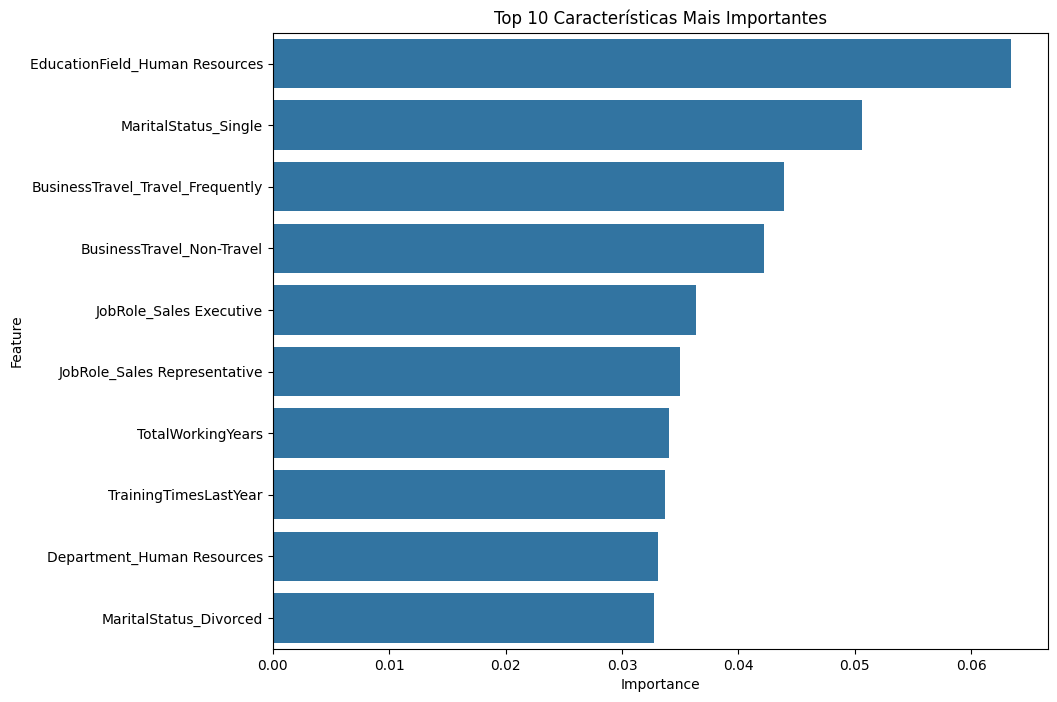

In [48]:
# Separar recursos e variável alvo
X = df.drop(columns=['Attrition'])  # 'Attrition' é a variável alvo
y = df['Attrition']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

xgb_model = xgb.XGBClassifier(random_state=42)
xgb_model.fit(X_train_scaled, y_train)

y_pred = xgb_model.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Obter a importância das características do modelo XGBoost
feature_importances = xgb_model.feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Top 10 características pela importância
top_10_importance = feature_importance_df.head(10)

# Gráfico de barras para as top 10 importâncias
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=top_10_importance)
plt.title('Top 10 Características Mais Importantes')
plt.show()


In [49]:
# Top 10 características pela importância
fig_importance_top_10 = px.bar(top_10_importance, x='Importance', y='Feature', orientation='h', title='Top 10 Características Mais Importantes (Importância)', text='Importance')
fig_importance_top_10.update_traces(texttemplate='%{text:.2f}', textposition='outside')
fig_importance_top_10.update_layout(yaxis={'categoryorder':'total ascending'}, xaxis_title='Importância', yaxis_title='Característica')
fig_importance_top_10.show()


In [52]:
# Aplicação do RFE
rfe = RFE(estimator=xgb_model, n_features_to_select=1)
rfe.fit(X_train_scaled, y_train)

# Ordenar as características pela importância
feature_ranking = pd.DataFrame({
    'Feature': X.columns,
    'Ranking': rfe.ranking_
}).sort_values(by='Ranking')

# Top 10 características
top_10_features = feature_ranking.head(10)

# Gráfico de barras para as top 10 características com RFE
fig_top_10 = px.bar(
    top_10_features,
    x='Ranking',
    y='Feature',
    orientation='h',
    title='Top 10 Características Mais Importantes (RFE)',
    text='Ranking'
)
fig_top_10.update_traces(texttemplate='%{text:.2f}', textposition='outside')
fig_top_10.update_layout(
    yaxis={'categoryorder':'total ascending'},
    xaxis_title='Ranking',
    yaxis_title='Característica'
)
fig_top_10.show()

# Top 5 características
top_5_features = feature_ranking.head(5)

# Gráfico de barras para as top 5 características com RFE
fig_top_5 = px.bar(
    top_5_features,
    x='Ranking',
    y='Feature',
    orientation='h',
    title='Top 5 Características Mais Importantes (RFE)',
    text='Ranking'
)
fig_top_5.update_traces(texttemplate='%{text:.2f}', textposition='outside')
fig_top_5.update_layout(
    yaxis={'categoryorder':'total ascending'},
    xaxis_title='Ranking',
    yaxis_title='Característica'
)
fig_top_5.show()

print("Top 10 Características Mais Importantes:")
print(top_10_features)
print("Top 5 Características Mais Importantes:")
print(top_5_features)

Top 10 Características Mais Importantes:
                             Feature  Ranking
40              MaritalStatus_Single        1
16  BusinessTravel_Travel_Frequently        2
37      JobRole_Sales Representative        3
10                 TotalWorkingYears        4
18        Department_Human Resources        5
12                    YearsAtCompany        6
15         BusinessTravel_Non-Travel        7
36           JobRole_Sales Executive        8
11             TrainingTimesLastYear        9
6                 NumCompaniesWorked       10
Top 5 Características Mais Importantes:
                             Feature  Ranking
40              MaritalStatus_Single        1
16  BusinessTravel_Travel_Frequently        2
37      JobRole_Sales Representative        3
10                 TotalWorkingYears        4
18        Department_Human Resources        5


In [53]:
# Matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred)

# Relatório de classificação
#class_report = classification_report(y_test, y_pred_xgb, output_dict=True)

# Matriz de confusão plot
labels = ['Não', 'Sim']
fig_conf_matrix = ff.create_annotated_heatmap(
    z=conf_matrix,
    x=labels,
    y=labels,
    annotation_text=conf_matrix,
    colorscale='Viridis'
)

fig_conf_matrix.update_layout(
    title='Matriz de Confusão',
    xaxis=dict(title='Previsto'),
    yaxis=dict(title='Verdadeiro')
)

fig_conf_matrix.show()

In [54]:
# Relatório de classificação
class_report = classification_report(y_test, y_pred, output_dict=True)

# Preparar dados para o relatório de classificação
class_report_df = pd.DataFrame(class_report).transpose()
class_report_df = class_report_df.round(2)

# Título das colunas para o cabeçalho
headers = ['Metric'] + list(class_report_df.columns)

# Valores para as células da tabela
cells = [class_report_df.index] + [class_report_df[col] for col in class_report_df.columns]

# Criação da figura com subplots
#fig = make_subplots(rows=2, cols=1, subplot_titles=('Relatório de Classificação', 'Métricas de Avaliação'))
# Criação da figura com subplots
fig = make_subplots(
    rows=2, cols=1,
    specs=[[{"type": "table"}], [{"type": "xy"}]],  # Configurando tipos de subplots
    subplot_titles=('Relatório de Classificação', 'Métricas de Avaliação')
)

# Adicionando a tabela
fig.add_trace(
    go.Table(
        header=dict(
            values=headers,
            fill_color='paleturquoise',
            align='left'
        ),
        cells=dict(
            values=cells,
            fill_color='lavender',
            align='left'
        )
    ),
    row=1, col=1
)

# Preparando dados para o gráfico de linha
metrics = ['precision', 'recall', 'f1-score', 'accuracy']
# Adicionando os valores das métricas para cada classe
metric_values = {metric: class_report_df.loc[class_report_df.index[:-3], metric].values for metric in metrics[:-1]}
# Adicionando a acurácia separadamente
metric_values['accuracy'] = [class_report_df.loc['accuracy', 'f1-score']]

# Adicionando o gráfico de linha
for cls in class_report_df.index[:-3]:
    fig.add_trace(
        go.Scatter(
            x=metrics,
            y=[metric_values[metric][class_report_df.index[:-3].tolist().index(cls)] for metric in metrics[:-1]] + [metric_values['accuracy'][0]],
            mode='lines+markers',
            name=cls
        ),
        row=2, col=1
    )

# Atualizando layout da figura
fig.update_layout(
    title_text='Relatório de Classificação e Métricas de Avaliação',
    height=800  # Ajustando a altura para acomodar os subplots
)

# Mostrar a figura
fig.show()

In [56]:
# Calcular a curva de aprendizagem
train_sizes, train_scores, test_scores = learning_curve(xgb_model, X_train, y_train, cv=5, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10))

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Gráfico da curva de aprendizagem
fig_learning_curve = go.Figure()

fig_learning_curve.add_trace(go.Scatter(
    x=train_sizes,
    y=train_scores_mean,
    mode='lines+markers',
    name='Treinamento',
    line=dict(color='blue')
))

fig_learning_curve.add_trace(go.Scatter(
    x=train_sizes,
    y=test_scores_mean,
    mode='lines+markers',
    name='Validação',
    line=dict(color='green')
))

# Adicionar intervalo de confiança
fig_learning_curve.add_trace(go.Scatter(
    x=np.concatenate([train_sizes, train_sizes[::-1]]),
    y=np.concatenate([train_scores_mean - train_scores_std, (train_scores_mean + train_scores_std)[::-1]]),
    fill='toself',
    fillcolor='rgba(0, 0, 255, 0.1)',
    line=dict(color='rgba(255, 255, 255, 0)'),
    showlegend=False
))

fig_learning_curve.add_trace(go.Scatter(
    x=np.concatenate([train_sizes, train_sizes[::-1]]),
    y=np.concatenate([test_scores_mean - test_scores_std, (test_scores_mean + test_scores_std)[::-1]]),
    fill='toself',
    fillcolor='rgba(0, 255, 0, 0.1)',
    line=dict(color='rgba(255, 255, 255, 0)'),
    showlegend=False
))

fig_learning_curve.update_layout(
    title='Curva de Aprendizagem',
    xaxis_title='Tamanho do Conjunto de Treinamento',
    yaxis_title='Pontuação',
    legend_title='Curvas'
)

fig_learning_curve.show()


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.


In [58]:
# Separar recursos e variável alvo
X = df.drop(columns=['Attrition'])  # 'Attrition' é a variável alvo
y = df['Attrition']

# Dividir os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Padronizar os dados
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Treinar o modelo
model.fit(X_train_scaled, y_train)
model = RandomForestClassifier(random_state=42)
#tree_model = DecisionTreeClassifier(random_state=42)
model.fit(X_train_scaled, y_train)

# Fazer previsões
y_pred = model.predict(X_test_scaled)

# Avaliar o modelo
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9920634920634921
Confusion Matrix:
 [[740   0]
 [  7 135]]
Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00       740
           1       1.00      0.95      0.97       142

    accuracy                           0.99       882
   macro avg       1.00      0.98      0.99       882
weighted avg       0.99      0.99      0.99       882



In [59]:
# Previsões e avaliação
y_pred = model.predict(X_test)
y_pred_proba = xgb_model.predict_proba(X_test)[:, 1]

# Calcular a curva ROC e a pontuação AUC
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Gráfico ROC-AUC
fig_roc_auc = go.Figure()

fig_roc_auc.add_trace(go.Scatter(
    x=fpr,
    y=tpr,
    mode='lines',
    name=f'ROC Curve (AUC = {roc_auc:.2f})'
))

fig_roc_auc.add_trace(go.Scatter(
    x=[0, 1],
    y=[0, 1],
    mode='lines',
    line=dict(dash='dash'),
    showlegend=False
))

fig_roc_auc.update_layout(
    title='Curva ROC-AUC',
    xaxis_title='Taxa de Falsos Positivos (FPR)',
    yaxis_title='Taxa de Verdadeiros Positivos (TPR)',
    showlegend=True
)

fig_roc_auc.show()

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names


In [60]:
# Calcular a curva de aprendizagem
train_sizes, train_scores, test_scores = learning_curve(xgb_model, X_train, y_train, cv=5, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10))

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Gráfico da curva de aprendizagem
fig_learning_curve = go.Figure()

fig_learning_curve.add_trace(go.Scatter(
    x=train_sizes,
    y=train_scores_mean,
    mode='lines+markers',
    name='Treinamento',
    line=dict(color='blue')
))

fig_learning_curve.add_trace(go.Scatter(
    x=train_sizes,
    y=test_scores_mean,
    mode='lines+markers',
    name='Validação',
    line=dict(color='green')
))

# Adicionar intervalo de confiança
fig_learning_curve.add_trace(go.Scatter(
    x=np.concatenate([train_sizes, train_sizes[::-1]]),
    y=np.concatenate([train_scores_mean - train_scores_std, (train_scores_mean + train_scores_std)[::-1]]),
    fill='toself',
    fillcolor='rgba(0, 0, 255, 0.1)',
    line=dict(color='rgba(255, 255, 255, 0)'),
    showlegend=False
))

fig_learning_curve.add_trace(go.Scatter(
    x=np.concatenate([train_sizes, train_sizes[::-1]]),
    y=np.concatenate([test_scores_mean - test_scores_std, (test_scores_mean + test_scores_std)[::-1]]),
    fill='toself',
    fillcolor='rgba(0, 255, 0, 0.1)',
    line=dict(color='rgba(255, 255, 255, 0)'),
    showlegend=False
))

fig_learning_curve.update_layout(
    title='Curva de Aprendizagem',
    xaxis_title='Tamanho do Conjunto de Treinamento',
    yaxis_title='Pontuação',
    legend_title='Curvas'
)

fig_learning_curve.show()

/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.


In [ ]:
# Criar a nova coluna de faixa etária usando quartis
df['Faixa_Etaria'] = pd.qcut(df['Age'], q=4, labels=['18-30', '31-40', '41-50', '51-60'])

# Verificar os resultados
print(df[['Age', 'Faixa_Etaria']].head())

   Age Faixa_Etaria
0   51        51-60
1   31        31-40
2   32        31-40
3   38        41-50
4   32        31-40


In [ ]:
df.to_csv('rh_ml.csv', index=False)

In [180]:
import pandas as pd
df = pd.read_csv('/content/rh_ml.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 43 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Age                                  4410 non-null   int64  
 1   Attrition                            4410 non-null   int64  
 2   DistanceFromHome                     4410 non-null   int64  
 3   Education                            4410 non-null   int64  
 4   EmployeeID                           4410 non-null   int64  
 5   JobLevel                             4410 non-null   int64  
 6   MonthlyIncome                        4410 non-null   int64  
 7   NumCompaniesWorked                   4410 non-null   float64
 8   PercentSalaryHike                    4410 non-null   int64  
 9   StandardHours                        4410 non-null   int64  
 10  StockOptionLevel                     4410 non-null   int64  
 11  TotalWorkingYears             

**Recomendações**

**Foco no Estado Civil:** Divorciados podem estar mais propensos a deixar a empresa. Considere programas de suporte para essa situação.
**Avaliação do Campo de Educação:** Funcionários com grau técnico têm maior probabilidade de sair. Reavalie as estratégias de retenção para esses funcionários.
**Política de Viagens:** Funcionários que não viajam podem ter maior taxa de saída. Reavalie a política de viagens e ofereça alternativas para engajamento.

**Considerações Finais**

**O modelo XGBoost** se mostrou eficaz na previsão de rotatividade, com uma alta taxa de acerto.
Focar nas principais características pode ajudar a melhorar a retenção.
Continuar monitorando e ajustando o modelo com novos dados pode aumentar ainda mais a precisão das previsões.

Se houver alguma dúvida ou necessidade de mais detalhes, estou à disposição!


In [181]:
import plotly.graph_objects as go

# Cálculo dos totais
total_funcionarios = df.shape[0]
total_horas_trabalhadas = df['StandardHours'].max()

# Cálculo das medianas e média
mediana_treinamento = df['TrainingTimesLastYear'].median()
mediana_anos_trabalhados = df['TotalWorkingYears'].median()
media_anos_atual_gestor = df['YearsWithCurrManager'].mean()
mediana_num_empresas = df['NumCompaniesWorked'].median()

# Gráfico de cartão
fig_card = go.Figure()

# Adiciona os indicadores
fig_card.add_trace(go.Indicator(
    mode="number",
    value=total_funcionarios,
    title={"text": "Total de Funcionários Analisados"},
    domain={'x': [0, 0.5], 'y': [0.7, 1]},
    number={'font': {'color': 'darkblue'}}
))

fig_card.add_trace(go.Indicator(
    mode="number",
    value=total_horas_trabalhadas,
    title={"text": "Total de Horas Trabalhadas"},
    domain={'x': [0.5, 1], 'y': [0.7, 1]},
    number={'font': {'color': 'darkblue'}}
))

fig_card.add_trace(go.Indicator(
    mode="number",
    value=mediana_treinamento,
    title={"text": "Mediana de Treinamento no Ano Anterior"},
    domain={'x': [0, 0.5], 'y': [0.35, 0.65]},
    number={'font': {'color': 'darkblue'}}
))

fig_card.add_trace(go.Indicator(
    mode="number",
    value=mediana_anos_trabalhados,
    title={"text": "Mediana de Anos Trabalhados"},
    domain={'x': [0.5, 1], 'y': [0.35, 0.65]},
    number={'font': {'color': 'darkblue'}}
))

fig_card.add_trace(go.Indicator(
    mode="number",
    value=media_anos_atual_gestor,
    title={"text": "Média de Anos com o Atual Gestor"},
    domain={'x': [0, 0.5], 'y': [0, 0.3]},
    number={'font': {'color': 'darkblue'}}
))

fig_card.add_trace(go.Indicator(
    mode="number",
    value=mediana_num_empresas,
    title={"text": "Mediana de Empresas Trabalhadas"},
    domain={'x': [0.5, 1], 'y': [0, 0.3]},
    number={'font': {'color': 'darkblue'}}
))

# Atualizar layout
fig_card.update_layout(
    title="Resumo dos Dados",
    grid={'rows': 3, 'columns': 2},  # Ajusta a grade para comportar mais indicadores
    paper_bgcolor='lightblue'  # Define a cor de fundo azul claro
)

fig_card.show()


In [182]:
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Contagem de funcionários que saíram e que ficaram
df['Attrition'] = df['Attrition'].map({0: 'Ficaram', 1: 'Saíram'})
contagem_attrition = df['Attrition'].value_counts()

# Dados para gráfico de barras agrupadas
job_roles = df.filter(like='JobRole_').sum()
education_fields = df.filter(like='EducationField_').sum()
marital_statuses = df.filter(like='MaritalStatus_').sum()
viagens = df.filter(like='BusinessTravel_').sum()

# Criação do subplot
fig = make_subplots(
    rows=1, cols=2,
    subplot_titles=("Distribuição de Funcionários que Saíram e que Ficaram", "Função, Viagens, Campo Educacional e Estado Civil"),
    horizontal_spacing=0.15  # Ajusta o espaçamento horizontal entre os subplots
)

# Primeiro gráfico (Distribuição de Funcionários que Saíram e que Ficaram)
fig.add_trace(
    go.Bar(
        x=contagem_attrition.index,
        y=contagem_attrition.values,
        text=contagem_attrition.values,
        textposition='inside',
        marker=dict(color=['blue', 'blue'])
    ),
    row=1, col=1
)

# Segundo gráfico (Função, Viagens, Campo Educacional e Estado Civil)
fig.add_trace(go.Bar(
    x=job_roles.index,
    y=job_roles.values,
    name='Função',
    text=job_roles.values,
    textposition='outside',
    marker=dict(color='blue')
), row=1, col=2)

fig.add_trace(go.Bar(
    x=viagens.index,
    y=viagens.values,
    name='Viagens',
    text=viagens.values,
    textposition='outside',
    marker=dict(color='green')
), row=1, col=2)

fig.add_trace(go.Bar(
    x=education_fields.index,
    y=education_fields.values,
    name='Campo Educacional',
    text=education_fields.values,
    textposition='outside',
    marker=dict(color='red')
), row=1, col=2)

fig.add_trace(go.Bar(
    x=marital_statuses.index,
    y=marital_statuses.values,
    name='Estado Civil',
    text=marital_statuses.values,
    textposition='outside',
    marker=dict(color='magenta')
), row=1, col=2)

# Atualizar layout
fig.update_layout(
    height=600,
    width=1200,
    paper_bgcolor='lightblue',
    plot_bgcolor='lightblue',
    font=dict(color='darkblue'),
    legend=dict(
        x=1,
        y=1,
        traceorder="normal",
        font=dict(
            family="sans-serif",
            size=12,
            color="darkblue"
        ),
        bgcolor="lightblue",
        bordercolor="darkblue",
        borderwidth=2
    ),
    xaxis=dict(
        tickmode='linear',
        tickfont=dict(color='darkblue')
    ),
    yaxis=dict(
        tickfont=dict(color='darkblue')
    )
)

# Ajustar os títulos dos subplots
fig.update_annotations(font=dict(color='darkblue'))

fig.show()


In [183]:
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Contagem de funcionários por faixa etária e status de saída
faixa_etaria = df.groupby(['Faixa_Etaria', 'Attrition']).size().unstack(fill_value=0).reset_index()

# Gráfico de barras empilhadas (Faixa Etária)
fig_faixa_etaria = px.bar(
    faixa_etaria,
    x='Faixa_Etaria',
    y=['Ficaram', 'Saíram'],
    labels={'value': 'Número de Funcionários', 'Faixa_Etaria': 'Faixa Etária'},
    title='Distribuição da Faixa Etária dos Funcionários',
    color_discrete_map={'Ficaram': 'blue', 'Saíram': 'red'},
    text_auto=True,
    barmode='stack'
)

# Agrupando por 'YearsAtCompany' e 'Attrition' e calculando a renda mensal média
renda_media = df.groupby(['YearsAtCompany', 'Attrition'])['MonthlyIncome'].mean().unstack().fillna(0).reset_index()

# Gráfico de barras agrupadas (Renda Mensal Média por Anos na Empresa)
fig_renda_media = go.Figure()

fig_renda_media.add_trace(
    go.Bar(
        x=renda_media['YearsAtCompany'],
        y=renda_media['Ficaram'],
        name='Ficaram',
        text=renda_media['Ficaram'].apply(lambda x: f' {x:,.0f}'),
        textposition='auto',
        marker=dict(
            color='blue',
            line=dict(width=0.5, color='black')
        )
    )
)

fig_renda_media.add_trace(
    go.Bar(
        x=renda_media['YearsAtCompany'],
        y=renda_media['Saíram'],
        name='Saíram',
        text=renda_media['Saíram'].apply(lambda x: f' {x:,.0f}'),
        textposition='auto',
        marker=dict(
            color='red',
            line=dict(width=0.5, color='black')
        )
    )
)

# Combinação dos gráficos em um subplot
fig = make_subplots(
    rows=1, cols=2,
    subplot_titles=("Distribuição da Faixa Etária dos Funcionários", "Distribuição da Renda Mensal Média por Anos na Empresa"),
    horizontal_spacing=0.15
)

# Adiciona as traces ao subplot
fig.add_traces(fig_faixa_etaria.data, rows=1, cols=1)
fig.add_traces(fig_renda_media.data, rows=1, cols=2)

# Atualizar layout do subplot
fig.update_layout(
    height=600,
    width=1200,
    paper_bgcolor='lightblue',
    plot_bgcolor='lightblue',
    font=dict(color='darkblue'),
    legend=dict(
        x=1,
        y=1,
        traceorder="normal",
        font=dict(
            family="sans-serif",
            size=12,
            color="darkblue"
        ),
        bgcolor="lightblue",
        bordercolor="darkblue",
        borderwidth=2
    ),
    xaxis=dict(
        tickmode='linear',
        tickfont=dict(color='darkblue')
    ),
    yaxis=dict(
        tickfont=dict(color='darkblue')
    )
)

# Ajustar os títulos dos subplots
fig.update_annotations(font=dict(color='darkblue'))

fig.show()
